In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn import preprocessing
from scipy import stats
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
Path = 'housing.csv'
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
housing_data_df = pd.read_csv(Path, header = None, delimiter = r"\s+", names = column_names)
housing_data = [housing_data_df]

housing_data_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
housing_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [5]:
housing_data_df.shape

(506, 14)

In [6]:
housing_data_df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [7]:
housing_data_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [8]:
correlation = housing_data_df.corr()
correlation.shape

(14, 14)

<Axes: >

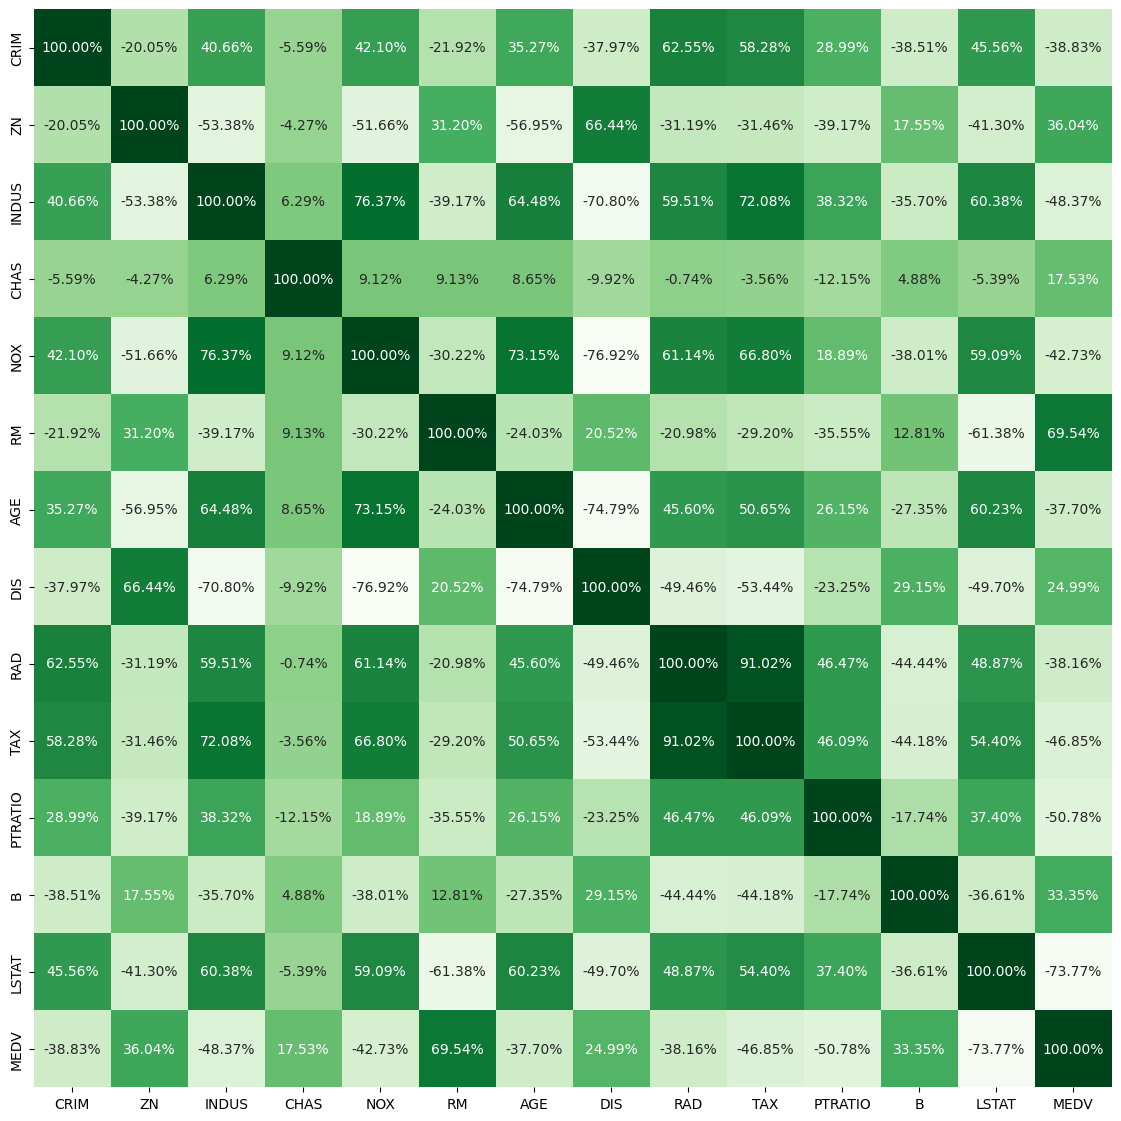

In [9]:
plt.figure(figsize = (14, 14))
sns.heatmap(correlation, cbar = False, square = True, fmt = '.2%', annot = True, cmap = 'Greens')

<Axes: >

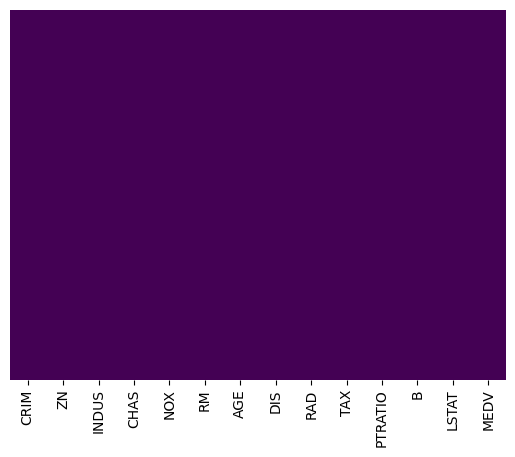

In [10]:
sns.heatmap(housing_data_df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

<Axes: xlabel='RAD', ylabel='count'>

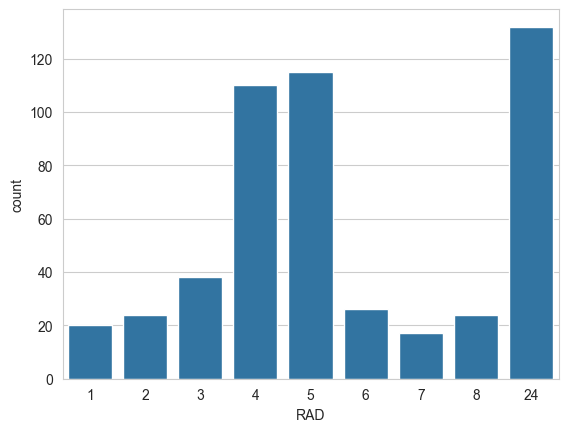

In [11]:
sns.set_style('whitegrid')
sns.countplot(x = 'RAD', data = housing_data_df)

<Axes: xlabel='CHAS', ylabel='count'>

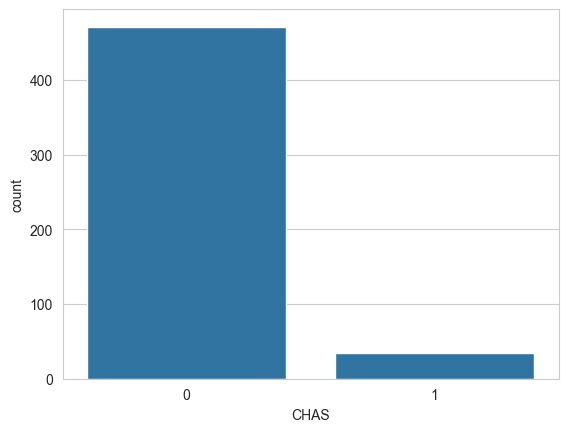

In [12]:
sns.set_style('whitegrid')
sns.countplot(x = 'CHAS', data = housing_data_df)

<Axes: xlabel='CHAS', ylabel='count'>

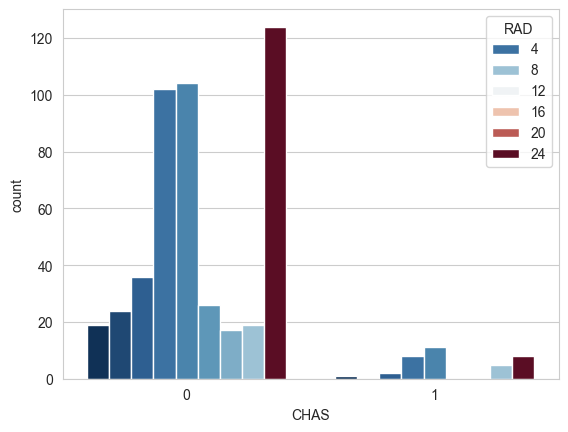

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'CHAS', hue = 'RAD', data = housing_data_df, palette = 'RdBu_r')

<Axes: xlabel='AGE'>

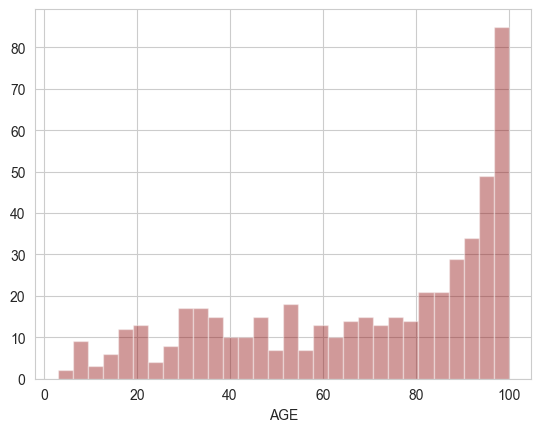

In [14]:
sns.distplot(housing_data_df['AGE'].dropna(), kde = False, color = 'darkred', bins = 30)

<Axes: xlabel='CRIM'>

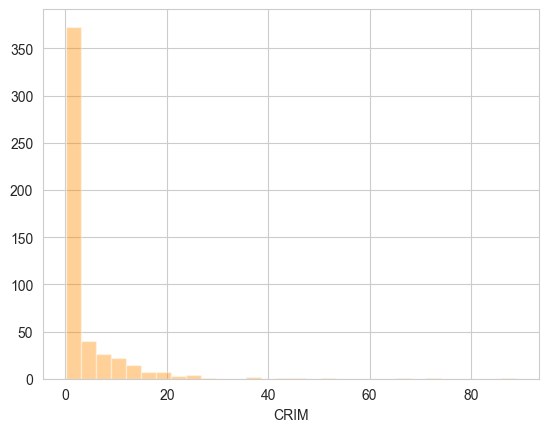

In [15]:
sns.distplot(housing_data_df['CRIM'].dropna(), kde = False, color = 'darkorange', bins = 30)

<Axes: xlabel='RM'>

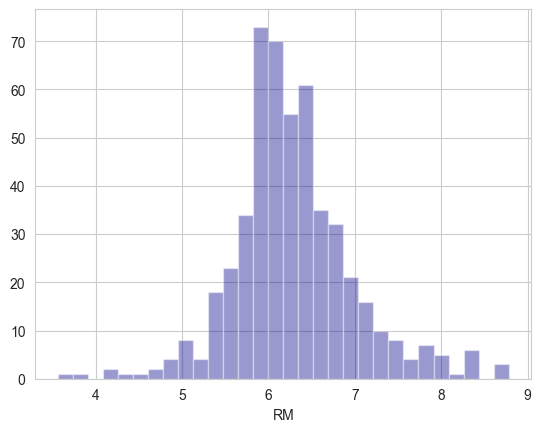

In [16]:
sns.distplot(housing_data_df['RM'].dropna(), kde = False, color = 'darkblue', bins = 30)

In [17]:
X = housing_data_df.iloc[:, 0:13]
y = housing_data_df.iloc[:, -1]

In [18]:
y = np.round(housing_data_df['MEDV'])

bestFeatures = SelectKBest(score_func = chi2, k = 10)
fit = bestFeatures.fit(X, y)
housing_data_dfscores = pd.DataFrame(fit.scores_)
housing_data_dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([housing_data_dfcolumns, housing_data_dfscores], axis = 1)
featureScores.columns = ['housing_data_Specs', 'housing_data_Score']
featureScores

,housing_data_Specs,housing_data_Score
0,CRIM,5503.817133
1,ZN,5937.859414
2,INDUS,873.746270
3,CHAS,59.080170
4,NOX,5.073299
5,RM,21.981504
6,AGE,2424.308937
7,DIS,163.919426
8,RAD,1445.257647
9,TAX,14817.836927


In [19]:
print(featureScores.nlargest(10, 'housing_data_Score'))

   housing_data_Specs  housing_data_Score
9                 TAX        14817.836927
1                  ZN         5937.859414
0                CRIM         5503.817133
11                  B         3340.486412
6                 AGE         2424.308937
8                 RAD         1445.257647
12              LSTAT         1430.549632
2               INDUS          873.746270
7                 DIS          163.919426
3                CHAS           59.080170


In [20]:
housing_data_df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [21]:
Min_Max_Scaler = preprocessing.MinMaxScaler()
column_sels = ['TAX', 'ZN', 'CRIM', 'B', 'AGE', 'RAD', 'LSTAT', 'INDUS']
X = housing_data_df.loc[:,column_sels]
y = housing_data_df['MEDV']
x = pd.DataFrame(data = Min_Max_Scaler.fit_transform(X), columns = column_sels)
x

,TAX,ZN,CRIM,B,AGE,RAD,LSTAT,INDUS
0,0.208015,0.180,0.000000,1.000000,0.641607,0.000000,0.089680,0.067815
1,0.104962,0.000,0.000236,1.000000,0.782698,0.043478,0.204470,0.242302
2,0.104962,0.000,0.000236,0.989737,0.599382,0.043478,0.063466,0.242302
3,0.066794,0.000,0.000293,0.994276,0.441813,0.086957,0.033389,0.063050
4,0.066794,0.000,0.000705,1.000000,0.528321,0.086957,0.099338,0.063050
5,0.066794,0.000,0.000264,0.992990,0.574665,0.086957,0.096026,0.063050
6,0.236641,0.125,0.000921,0.996722,0.656025,0.173913,0.295254,0.271628
7,0.236641,0.125,0.001554,1.000000,0.959835,0.173913,0.480684,0.271628
8,0.236641,0.125,0.002303,0.974104,1.000000,0.173913,0.778146,0.271628
9,0.236641,0.125,0.001840,0.974305,0.854789,0.173913,0.424117,0.271628


The above is preprocessing, and below is the algorithm.

Stage One: Data Preprocessing

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 加載數據
housing_data = housing_data_df

# 基本數據探索
print(housing_data.head())
print(housing_data.describe())

# 檢查缺失值
print(housing_data.isnull().sum())

# 數據標準化
scaler = StandardScaler()
features = housing_data.drop('MEDV', axis=1)
target = housing_data['MEDV']
features_scaled = scaler.fit_transform(features)

# 數據切分
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

Step 2: Model Training with XGBoost and K-fold Cross Validation

In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
import numpy as np

# 定義評估函數
def evaluate_model(model, X, y):
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)
    mape_scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_percentage_error', cv=kfold)
    rmse_scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
    r2_scores = cross_val_score(model, X, y, scoring='r2', cv=kfold)
    return -mape_scores, -rmse_scores, r2_scores

# 初始化XGBoost模型
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# 評估模型
mape_scores, rmse_scores, r2_scores = evaluate_model(xgb_model, X_train, y_train)

# 顯示結果
print("MAPE scores:", mape_scores)
print("Average MAPE:", np.mean(mape_scores))
print("RMSE scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))
print("R2 scores:", r2_scores)
print("Average R2:", np.mean(r2_scores))

MAPE scores: [0.13109193 0.11303021 0.10876376 0.11646151 0.11826408]
Average MAPE: 0.11752229873211
RMSE scores: [3.57997702 3.15927136 4.01421463 4.01451975 3.16763176]
Average RMSE: 3.587122905333981
R2 scores: [0.81974325 0.89837667 0.81862491 0.84930663 0.84858543]
Average R2: 0.8469273799118217


Step 3: Feature Importance Analysis and Feature Selection

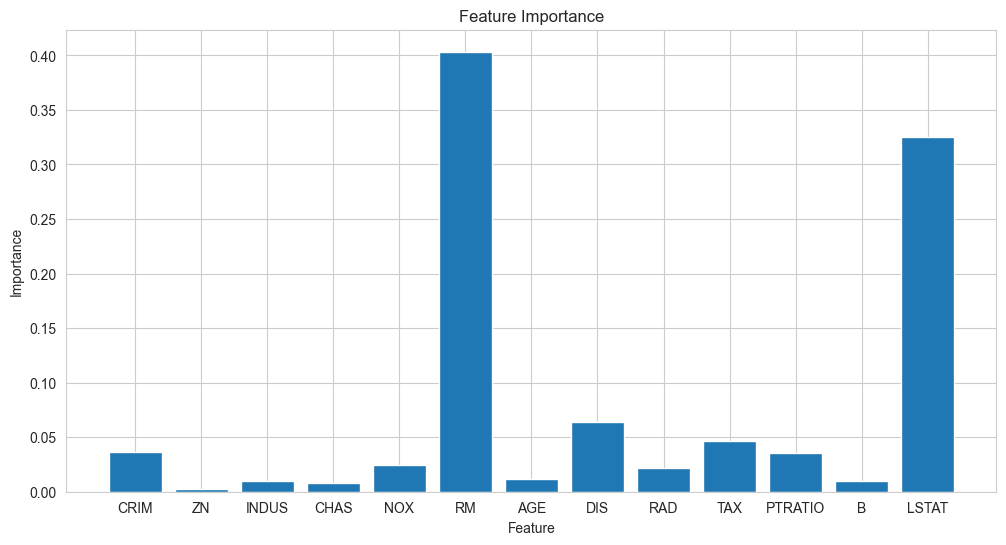

RM: 0.40330278873443604
LSTAT: 0.3252844214439392
DIS: 0.06351681053638458
TAX: 0.046922195702791214
CRIM: 0.036415647715330124
PTRATIO: 0.035251419991254807
NOX: 0.024681078270077705
RAD: 0.02167651243507862
AGE: 0.011991804465651512
B: 0.010268994607031345
INDUS: 0.01015847735106945
CHAS: 0.00758212897926569
ZN: 0.0029477791395038366


In [24]:
import matplotlib.pyplot as plt

# 訓練模型以獲取特徵重要性
xgb_model.fit(X_train, y_train)
feature_importances = xgb_model.feature_importances_

# 特徵名稱
feature_names = housing_data.columns[:-1]

# 繪製特徵重要性
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

# 根據重要性篩選特徵
sorted_idx = np.argsort(feature_importances)[::-1]
for index in sorted_idx:
    print(f"{feature_names[index]}: {feature_importances[index]}")

Step 4: Perform Feature Selection and Reevaluate the Model

In [25]:
# 移除重要性較低的特徵
features_selected = features_scaled[:, feature_importances > 0.02]

# 重新切分數據
X_train_selected, X_test_selected, y_train, y_test = train_test_split(features_selected, target, test_size=0.2, random_state=42)

# 重新訓練模型
xgb_model_selected = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model_selected.fit(X_train_selected, y_train)

# 重新評估模型
mape_scores_selected, rmse_scores_selected, r2_scores_selected = evaluate_model(xgb_model_selected, X_train_selected, y_train)

# 顯示新模型的結果
print("Selected Features MAPE scores:", mape_scores_selected)
print("Selected Features Average MAPE:", np.mean(mape_scores_selected))
print("Selected Features RMSE scores:", rmse_scores_selected)
print("Selected Features Average RMSE:", np.mean(rmse_scores_selected))
print("Selected Features R2 scores:", r2_scores_selected)
print("Selected Features Average R2:", np.mean(r2_scores_selected))

Selected Features MAPE scores: [0.13030732 0.10932002 0.12219344 0.11545525 0.12070567]
Selected Features Average MAPE: 0.11959634138133739
Selected Features RMSE scores: [3.42304752 3.08822257 4.26622687 3.42539238 3.04321828]
Selected Features Average RMSE: 3.4492215251929914
Selected Features R2 scores: [0.83520011 0.90289609 0.79513661 0.89028965 0.86024592]
Selected Features Average R2: 0.8567536765425148


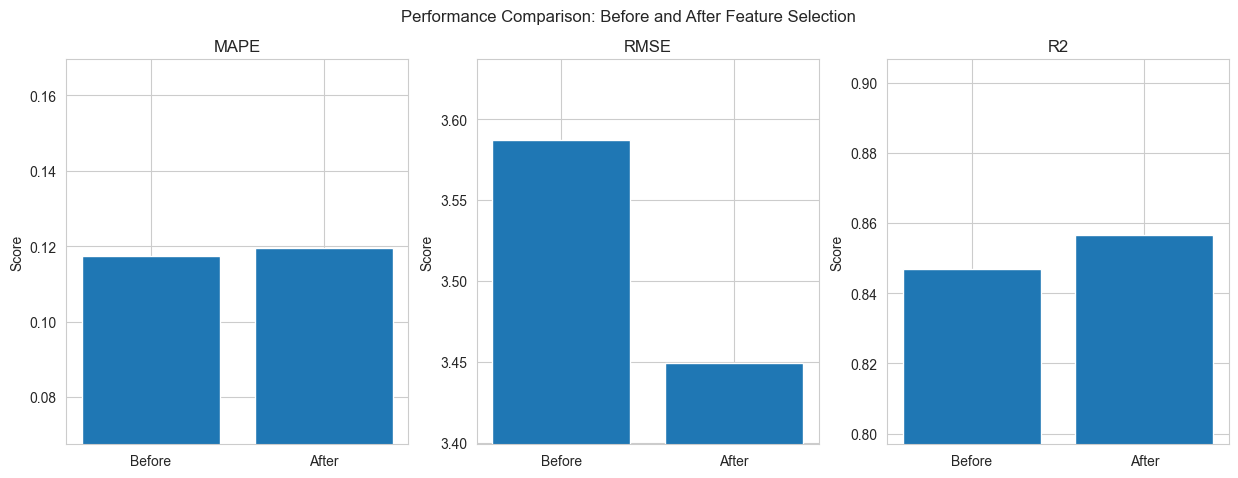

In [26]:
import matplotlib.pyplot as plt

# 設定績效指標數據
performance_metrics = {
    'MAPE': {'Before': 0.11752229873211, 'After': 0.11959634138133739},
    'RMSE': {'Before': 3.587122905333981, 'After': 3.4492215251929914},
    'R2': {'Before': 0.8469273799118217, 'After': 0.8567536765425148}
}

# 繪製柱狀圖來展示績效差異
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(performance_metrics.keys()):
    axes[i].bar(performance_metrics[metric].keys(), performance_metrics[metric].values())
    axes[i].set_title(metric)
    axes[i].set_ylabel('Score')
    axes[i].set_ylim(min(performance_metrics[metric].values()) - 0.05, max(performance_metrics[metric].values()) + 0.05)

plt.suptitle('Performance Comparison: Before and After Feature Selection')
plt.show()


Performance Comparison:
MAPE - Before: 0.11752229873211, After: 0.11959634138133739
RMSE - Before: 3.587122905333981, After: 3.4492215251929914
R2 - Before: 0.8469273799118217, After: 0.8567536765425148


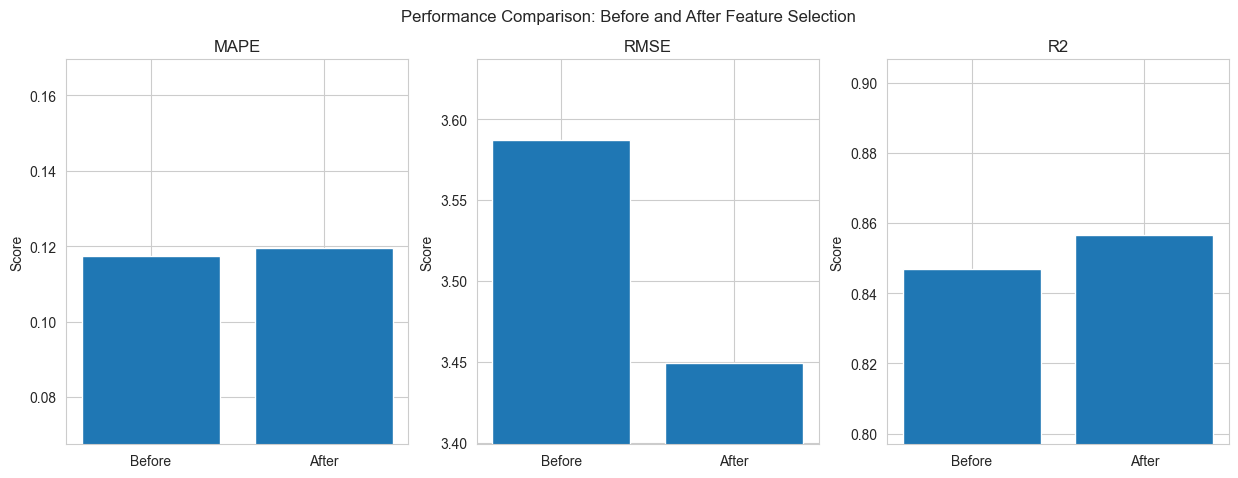

In [27]:
# 先前計算的績效指標
# 特徵篩選前的指標
before_mape_avg = mape_scores
before_rmse_avg = rmse_scores
before_r2_avg = r2_scores

# 特徵篩選後的指標
after_mape_avg = np.mean(mape_scores_selected)
after_rmse_avg = np.mean(rmse_scores_selected)
after_r2_avg = np.mean(r2_scores_selected)

# 設定績效指標數據
performance_metrics = {
    'MAPE': {'Before': before_mape_avg, 'After': after_mape_avg},
    'RMSE': {'Before': before_rmse_avg, 'After': after_rmse_avg},
    'R2': {'Before': before_r2_avg, 'After': after_r2_avg}
}

# 文字輸出方便確認
print("Performance Comparison:")
for metric, values in performance_metrics.items():
    print(f"{metric} - Before: {values['Before']}, After: {values['After']}")

# 繪製柱狀圖來展示績效差異
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, metric in enumerate(performance_metrics.keys()):
    axes[i].bar(performance_metrics[metric].keys(), performance_metrics[metric].values())
    axes[i].set_title(metric)
    axes[i].set_ylabel('Score')
    axes[i].set_ylim(min(performance_metrics[metric].values()) - 0.05, max(performance_metrics[metric].values()) + 0.05)

plt.suptitle('Performance Comparison: Before and After Feature Selection')
plt.show()
